A while back I wrote a post on [Embedding Matplotlib Animations in Jupyter Noteboks](../embedding-matplotlib-animations-in-jupyter-notebooks), which became surprisingly popular. It outlined how to render [Matplotlib animations](https://matplotlib.org/api/animation_api.html) in the [Jupyter Notebook](http://jupyter.org/), by encoding it as a HTML5 video using the `to_html5_video` method introduced in the release of [Matplotlib 1.5](https://matplotlib.org/users/prev_whats_new/whats_new_1.5.html#display-hook-for-animations-in-the-ipython-notebook).

Three years have gone by since then, and much has changed in the world of open-source scientific Python. [Matplotlib 2.1](https://matplotlib.org/users/prev_whats_new/whats_new_2.1.0.html#interactive-js-widgets-for-animation) was released towards the end of last year, and was the first release with major new features since 1.5. Among many significant enhancements, the release included the merge of Jake Vanderplas' [JSAnimation](https://github.com/jakevdp/JSAnimation) package, a tool for rendering Matplotlib animations as interactive JavaScript widgets.

With this awesome addition, encapsulated in the new `to_jshtml` method,
we are now able to embed an interactive JavaScript widget for playback of Matplotlib animations directly inside a Jupyter Notebook.

In this post, we demonstrate how to use this method on the same example animation from my previous post, which was originally derived from an even earlier [post by Jake VanderPlas](http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/).

<!-- TEASER_END -->

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Creating the Animation

First set up the figure, the axis, and the plot element we want to animate:

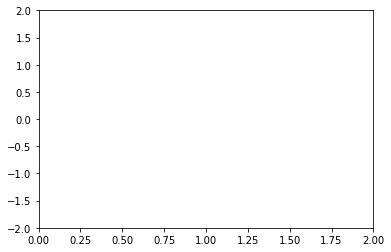

In [3]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

Define the initialization function, which plots the background of each frame:

In [4]:
def init():
    line.set_data([], [])
    return (line,)

Define the animation function, which is called for each new frame:

In [5]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

Compile the animation. Setting `blit=True` will only re-draw the parts that have changed.

In [6]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

## Displaying the Animation

Now we can display this `anim` object using IPython's HTML display method. For comparison, we first encode the animation and render it as an HTML5 video using the `to_html5_video` method, as covered in my previous post:

In [7]:
HTML(anim.to_html5_video())

Now to create an interactive JavaScript widget using the `to_jshtml` method:

In [8]:
HTML(anim.to_jshtml())

It's that simple!

## Setting interactive Javascript widgets as the default HTML representation of Animation objects 

To support inline display of animations in the notebook, an [Animation](http://matplotlib.org/api/animation_api.html#matplotlib.animation.Animation) object comes with a `_repr_html_` method. However, it returns `None` by default:

In [9]:
# Initialize the Animation object again
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [10]:
anim._repr_html_() is None

True

This means it won't automatically display the animation when referenced. Instead, it will just display its default HTML representation, which is just a string:

In [11]:
anim

To make the interactive JavaScript widget the default HTML representation, we just have to set the `animation.html` rc parameter, which now supports the values `none`, `jshtml` and `html5`. The default is `none`, performing no display. We simply need to set it to `jshtml`:

In [12]:
rc('animation', html='jshtml')

Note that this is equivalent to (and, in my opinion, neater than):

```Python
 rcParams['animation.html'] = 'jshtml'
```

Now we can just reference the Animation instance and display the widget inline:

In [13]:
anim

## Additional Resources

Check out Jake's post titled [A Javascript Viewer for Matplotlib Animations](https://jakevdp.github.io/blog/2013/05/19/a-javascript-viewer-for-matplotlib-animations/) from 2013 for more information about this widget. I would also like to highlight the following StackOverflow  answers wherein I first learned about this new feature:

- https://stackoverflow.com/a/43447370/1924843
- https://stackoverflow.com/a/46878531/1924843

To receive updates about more posts like this, follow me on [Twitter](https://twitter.com/louistiao) or [GitHub](https://github.com/ltiao)!